## BREAST CANCER ANALYSIS
  A new study examined the identification of breast cancer based on several tumor features.  Important morphological characteristics taken from mammography pictures to distinguish between Benign and Malignant cases.

1. Benign - non cancerous tumor
2. Malignant - cancerous tumor

Key Features Analyzed:
The analysis included the following tumor attribute
1. Size-related features: radius_mean, perimeter_mean, area_mean, radius_se, radius_worst.
2. Texture-related features: texture_mean, texture_se, texture_worst
3. Shape and boundary-related features: smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_means

In [749]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [750]:
# Import the csv file 
data = pd.read_csv('breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploratory Data Analysis (EDA)
Before using models, datasets are analyzed and summarized to better understand their patterns, trends, and significant properties.  It aids in detecting missing values, outliers, relationships, and distributions in the data.

In [752]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [753]:
# Clean the dataset    
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [754]:
data = data.drop_duplicates()

In [755]:
# Drop unimportant columns
new_data = data.drop(columns=['id'])

In [756]:
# number of Diagnosis
new_data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [757]:
new_data.shape

(569, 31)

In [758]:
new_data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [759]:
# create a boxplot function of all the features for visualization
def boxplot(new_data):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(new_data.columns[1:], start=1):  
        plt.subplot(6, 5, i)
        sns.boxplot(y=new_data[col])  # Fix: Using 'y' argument
        plt.title(col)
    plt.tight_layout()
    plt.show()

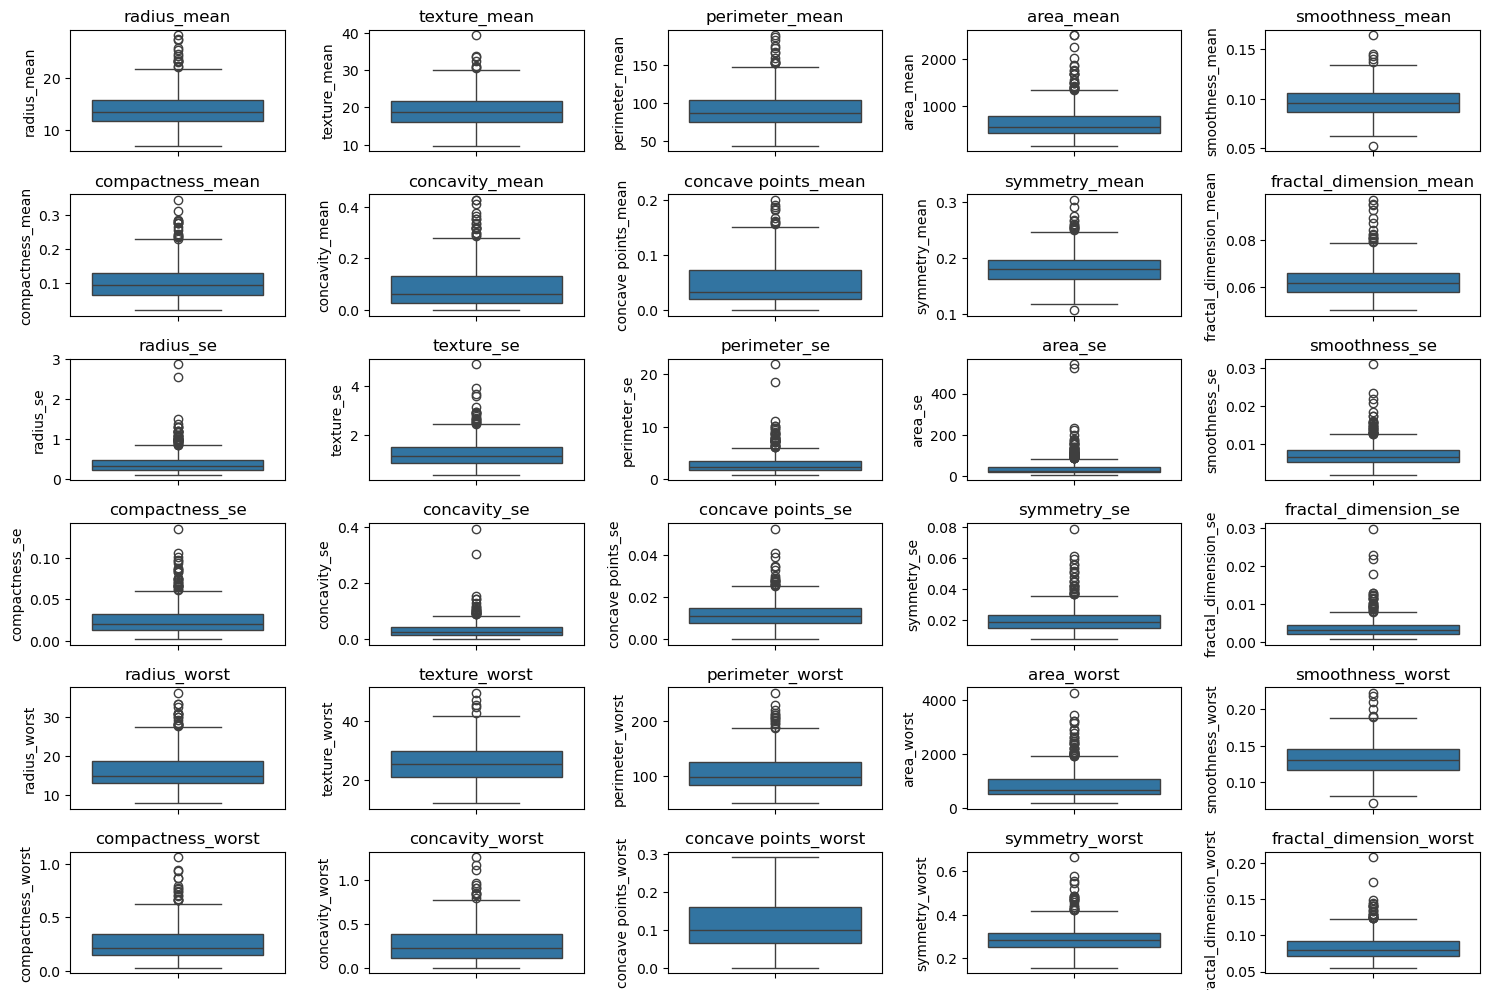

In [760]:
boxplot(new_data)

In [761]:
new_data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Mean Radius: Larger values are often associated with malignancy.
Mean Texture: Variations in texture can be indicative of cancerous cells.
Mean Perimeter: Similar to radius, larger values might suggest malignancy.
Mean Area: Larger areas can be associated with cancerous cells.
Mean Smoothness: Irregularities in smoothness might indicate malignancy
Mean Compactness: Higher compactness can be a sign of cancerous cells.
Mean Concavity: Severity of concave portions of the contour; higher values might suggest malignancy.
Mean Concave Points: Number of concave portions of the contour; higher values can indicate malignancy.gnancy.

## LOGISTIC REGRESSION

In [764]:
# Pick Important data as the features
X = new_data[['radius_mean','texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean']]
y = new_data['diagnosis']
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430


In [765]:
from sklearn.preprocessing import LabelEncoder

# add encode label to the feature
encode= LabelEncoder()
y = encode.fit_transform(y)


# Standardization of the Independent variables

In [767]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [768]:
# Split the data for modeling
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [769]:
# set the regularization type
#penalty = 'l2'

In [770]:
# set the regularization strength
#C = 0.01

In [771]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [772]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0])

In [773]:
# Get the accuracy of the model
model.score(X_test,y_test)

0.9035087719298246

In [774]:
# Check for the accuracy of the train model to check if there is no overfitting
model.score(X_train,y_train)

0.9538461538461539

## Confusion matrix


In [776]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        73
           1       0.92      0.80      0.86        41

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.90      0.90       114



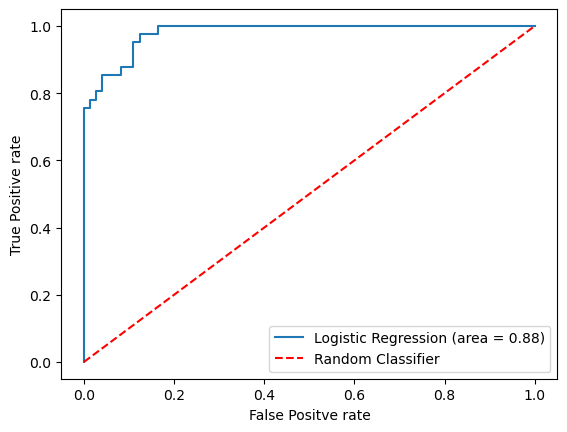

In [777]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# plot the aoc of L0gistic regressionfor visualization
logistic_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test,model.predict_log_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label = 'Logistic Regression (area = %0.2f)'% logistic_roc_auc)
plt.plot([0,1],[0,1],'r--',label = 'Random Classifier')
plt.xlabel('False Positve rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show()

## Other Machine Learning Technique

In [779]:
# using other technique to see the best
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# assign the model to a variable
models = [SVC(), RandomForestClassifier(), DecisionTreeClassifier()]


parameters = {'SVM': {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]},
              'Random Forest': {'n_estimators': [10, 100, 1000], 'max_depth': [2, 5, 10, 20, 50, 100, 1000]},
              'Decision Tree': {'max_depth': [2, 5, 10, 20, 50, 100, 1000]}}

models = {'SVM': SVC(),
          'Random Forest': RandomForestClassifier(),
          'Decision Tree': DecisionTreeClassifier()}

scores = {}

for model_name, mode in models.items():
    grid = GridSearchCV(mode, parameters[model_name])
    grid.fit(X, y)
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best score for {model_name}: {grid.best_score_}")
    
    scores[model_name] = grid.best_score_

print(scores)
# get the best score:
print(f"The model with the best score was {max(scores, key=scores.get)} with a score of {max(scores.values())}")


Best parameters for SVM: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score for SVM: 0.9543238627542306
Best parameters for Random Forest: {'max_depth': 1000, 'n_estimators': 100}
Best score for Random Forest: 0.9490451793199813
Best parameters for Decision Tree: {'max_depth': 5}
Best score for Decision Tree: 0.9244527247321843
{'SVM': 0.9543238627542306, 'Random Forest': 0.9490451793199813, 'Decision Tree': 0.9244527247321843}
The model with the best score was SVM with a score of 0.9543238627542306
